In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cluster import KMeans

/Users/ericphu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('pokemon.csv')
df.columns
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


<h1> Introduction</h1>

Pokemon is a beloved RPG (role playing game) about collecting "Pocket monsters." Together with them you train and battle your way, with other trainers, to the top to become the Pokemon Master! As an avid fan of the series I have decided to make a fan made version. Being the super fan I am, I wanted to make this game as close as possible to a Game Freak (creators of Pokemon) would publish themselves.

<h2> The Dataset</h2>

To accomplish this, I found a data set that contain all the Pokemon (up to the 6th generation) and the 23 variables that make up that Pokemon. The 23 column’s' descriptors are split up into 13 numerical types, 6 categorical, and 3 Boolean.

<ul>
    <li><b>Number:</b> Is the unique number associated Pokedex id number for the Pokemon. </li>
    <li><b>Name: </b> Is the unique name of the Pokemon.</li>
    <li><b>Type_1:</b> Primary nature of the Pokemon. This categorical value can take 18 different values: <i>Bug, Dark, Dragon, Electric, Fairy, Fighting, Fire, Flying, Ghost, Grass, Ground, Ice, Normal, Poison, Psychic, Rock, Steel, and Water</i>.</li>
    <li><b>Type_2: </b>Secondary nature of the Pokemon. Takes same values as Type_1. Not all Pokemon have a Type_2 classified as Pure types. </li>
    <li><b>Total: </b>Combined stats of all of the next 7 variables. This can be considered as the max power of the Pokemon. These values are discrete and can theroically go to infinity. </li>
    <li><b>HP:</b> Hit Points. This value represents how much damage a Pokemon can recieve in battle. </li>
    <li><b>Attack:</b> This value is directly related to how much damage the Pokemon's physical attack does. </li>
    <li><b>Defense:</b> This value is directly related to how resistant the Pokemon is to physical attacks.</li>
    <li><b>Sp_Atk:</b> This value is directly related to how much damage the Pokemon's special attack does.</li>
    <li><b>Sp_Def:</b> This value is directly related to how resistant the Pokemon is to special attacks.</li>
    <li><b>Speed:</b> This value is represent how fast the Pokemon is in battle.</li>
    <li><b>Generation:</b> The iteration the Pokemon was released. This value goes up to 10.</li>
    <li><b>isLegendary:</b> Boolean value that states weather a Pokemon is Legendary (Unique per game)</li>
    <li><b>Color:</b> The primary color of the Pokemon according to the Pokédex. The Pokédex distinguishes between ten colors: <i>Black, Blue, Brown, Green, Grey, Pink, Purple, Red, White, and Yellow.</i></li>
    <li><b>hasGender:</b> Boolean. Indicates if Pokemon can be classified as Male or Female.</li>
    <li><b>Pr_Male:</b> Probability the Pokemon is a male. To get female probability do subtract 1 from this value. This variable is numerical and discrete. It can only take 7 values: 0, 0.125, 0.25, 0.5, 0.75, 0.875, and 1</li>
    <li><b>Egg_Group_1:</b> Categorical value indicating the egg group of the Pokémon. It is related with the race of the Pokémon, and it is a determinant factor in the breeding of the Pokémon. Its 15 possible values are: Amorphous, Bug, Ditto, Dragon, Fairy, Field, Flying, Grass, Human-Like, Mineral, Monster, Undiscovered, Water_1, Water_2, and Water_3.</li>
    <li><b>Egg_Group_2:</b> Secondary race of Pokemon.</li>
    <li><b>hasMegaEvolution:</b> Boolean indicating whether a Pokémon can mega-evolve or not. Mega-evolving is property that some Pokémon have and allows them to change their appearance, types, and stats during a combat into a much stronger form.</li>
    <li><b>Height_m:</b>Height of Pokemon according to Pokedex, continuous</li>
    <li><b>Weight_kg:</b>Weight of Pokemon according to Pokedex, continuous</li>
    <li><b>Body_Style:</b> Body style of the Pokémon according to the Pokédex. 14 categories of body style are speci- fied: <i>bipedal_tailed, bipedal_tailless, four_wings, head_arms, head_base, head_legs, head_only, insectoid, multiple_bodies, quadruped, serpentine_body, several_limbs, two_wings, and with_fins.</i></li>
    <li><b>Catch_Rate:</b> Numerical variable indicating how easy is to catch a Pokémon when trying to capture it to make it part of your team. It is bounded between 3 and 255. The number of different values it takes is not too high notwithstanding, we can consider it is a continuous variable.</li>
     <li><b>Has_Evo:</b> Boolean Variable I added myself to indicate if the Pokemon has an Evo.</li>
</ul>.

<h2>Exploring the Data Set</h2>

There are couple of question I would like to explore in this dataset that would help me build my game, some through Data Visualization some by machine learning algorithms.

<ul>
  <li><b>Data Visualization Questions</b></li>
    <ol>
      <li>How many Pokemon are added each generation? </li>
      <li>How are stats distributed? </li>
      <li>How are types distributed?</li>
      <li>How are types and stats related?</li>
    </ol>
  <li><b>Machine Algorithm Questions</b></li>
  <ol>
  <li>Unsupervised Learning: Are there any relationships in Catch Rate?</li>
  <li>Supervised Learning: Can I build a predictive model from any information gained?</li>
  </ol>
</ul>

<h1><b>Data Visulisation Questions</b></h1>

<h3>How Many Pokemon Are Added Each Generation?</h3>

First, if I am going to make a new Pokemon game I need to know how many new Pokemon I should add to my Generation. To do this I will look at how many new Pokemon were added to each previous generation. To accomplish this, I will use a group by function by the Generations column; I will then perform the count operation on the groupby object to get the count of the total amount of Pokemon per Generation. I will also get the total number of dual types Pokemon because I would like to see if there is a pattern that GameFreak uses to add these types of Pokemon.

In [4]:
#Group by Generation
gen_group = df.groupby(df['Generation'])
gen_count = gen_group.count()
gen_count[['Type_1','Type_2']]

,Type_1,Type_2
Generation,,
1,151,67
2,100,49
3,135,66
4,107,53
5,156,74
6,72,41


Now that I have the count of the amount of Pokemon GameFreak adds per generation I will create two graphs to see. First, I will create a box and whisker graph to see the average and the percentiles of the amount of pokemon added. The second graph will just be a bar graph of each generation, I will also overlay the dual types on this graph to see if there are any realtionship with the number of dual types to the number of total Pokemon.

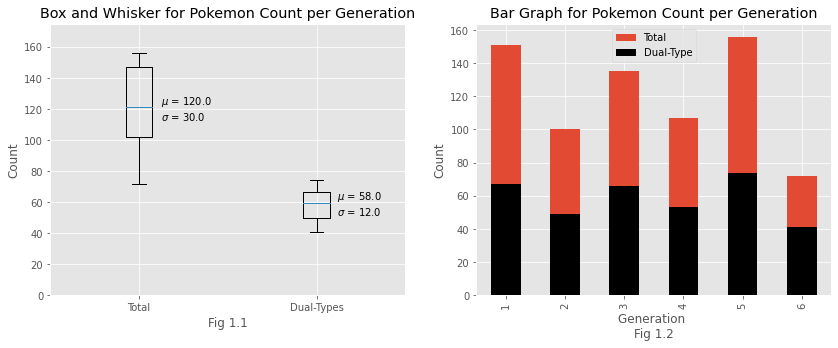

In [5]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1,2, figsize=(14,5))

data = [gen_count['Type_1'],gen_count['Type_2']]
bplot = ax[0].boxplot(data)
  
mean1 = str(np.round(np.mean(gen_count['Type_1'])))
std1 = str(np.round(np.std(gen_count['Type_1'])))
mean2 = str(np.round(np.mean(gen_count['Type_2'])))
std2 = str(np.round(np.std(gen_count['Type_2'])))
ax[0].text(.235, 0.61, "$\mu$ = " + mean1 + "\n$\sigma$ = " + std1, fontsize=10, transform=plt.gcf().transFigure)
ax[0].text(.41, 0.348, "$\mu$ = " + mean2 + "\n$\sigma$ = " + std2, fontsize=10, transform=plt.gcf().transFigure)
ax[0].set_ylim([0,175])
ax[0].title.set_text("Box and Whisker for Pokemon Count per Generation")
ax[0].set_xticklabels(["Total","Dual-Types"])
ax[0].yaxis.grid(True)
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Fig 1.1")

gen_count['Type_1'].plot(ax=ax[1],kind='bar',label="Total")
gen_count['Type_2'].plot(ax=ax[1],kind='bar',color='black',label="Dual-Type")
ax[1].legend()
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Generation \nFig 1.2")
ax[1].title.set_text("Bar Graph for Pokemon Count per Generation")

So, it appears GameFreak usually adds around 120 new Pokemon each new Generation (the min 72 (gen 6) and the max 156 (gen 5)). It also appears that GameFreak uses around half of the new Pokemon as dual types. The standard deviation of new Pokemon added is around 30 so I would be comfortably saying that a new generation size is around (90-150), to also follow tradition I should make half of the number I decide on dual types.

<h3>How are Total Stats Distributed to Pokemon?</h3>

Once we have the Pokemon, next we need to know their genetics. Pokemon are made up of 6 battle stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. Right now, we will worry about the combination of all of these stats, we will call it total stats (I know creative right?). Pokemons' ultimate battle potential and strength are based on this total stat, so it is important so see the distribution of the variable. Pokemon range from very weak (there is literally a rat Pokemon) to incredibly strong like the Legendary Pokemon (the gods of the Pokemon world). Knowing this I am assuming the distribution is normal.

[]

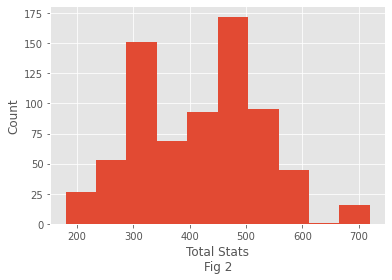

In [6]:
# Extracting Total Stats Column and ploting
count_split = df['Total']
plt.hist(count_split,bins=10)
plt.xlabel("Total Stats\nFig 2")
plt.ylabel("Count")
plt.plot()

This is surprising, rather than having a normal distribution, the distribution is bimodal. Thinking why this is, I have hypothesized that the reason for these two humps can be linked to the fact that Pokemon can evolve. The first hump would be the distribution of Pokemon that still need to Evolve, and the second hump would be the Pokemon that can no longer evolve. Unfortunately for me this dataset did not contain if the Pokemon have reached their max evolution. To remedy this, I scrape this Boolean value off of a website.(https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_evolution_family)

In [7]:
from has_evo import final_list

has_evo = final_list

Has_Evo = []
for x in df['Name']:
    if x in has_evo:
        Has_Evo.append(True)
    else:
        Has_Evo.append(False)

#Adding column to dataframe
df['Has_Evo'] = Has_Evo

has_evo = df[df['Has_Evo'] == True]
final_evo = df[df['Has_Evo'] == False]

count_evo_stats = has_evo['Total']
count_final_stats = final_evo['Total']

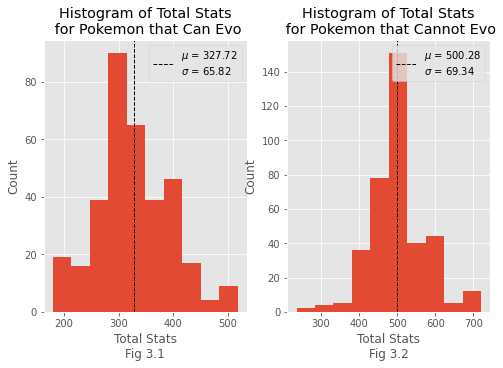

In [8]:
fig, ax = plt.subplots(1,2,figsize=(8,5))

ax[0].hist(count_evo_stats,bins=10)
ax[0].axvline(count_evo_stats.mean(), color='k', linestyle='dashed', linewidth=1,label="$\mu$ = " + str(round(np.mean(count_evo_stats),2))+
                                                                                     "\n$\sigma$ = "+ str(round(np.std(count_evo_stats),2)))
ax[0].set_xlabel("Total Stats\nFig 3.1")
ax[0].set_ylabel("Count")
ax[0].title.set_text("Histogram of Total Stats\n for Pokemon that Can Evo")
ax[0].legend()

ax[1].hist(count_final_stats,bins=10)
ax[1].axvline(count_final_stats.mean(), color='k', linestyle='dashed', linewidth=1,label="$\mu$ = " + str(round(np.mean(count_final_stats),2))+
                                                                                        "\n$\sigma$ = "+ str(round(np.std(count_final_stats),2)))
ax[1].set_xlabel("Total Stats\nFig 3.2")
ax[1].set_ylabel("Count")
ax[1].title.set_text("Histogram of Total Stats\n for Pokemon that Cannot Evo")
ax[1].legend(loc='upper right')


As you can see by splitting the data between the Pokemon that has evolved and the Pokemon that cannot evolve the total stats between the two follow a normal distribution. If we count Entropy and Information Gain, we can see that this split was very useful a value of .2.

$$E(D) = -\sum_{i=1}^c p_i \log_2p_i$$

$$IG(D) = E(D_p) - \frac{N_{left}}{N}E(D_{left}) - \frac{N_{right}}{N}E(D_{right})$$

In [9]:
# Parent Entropy
hist1 = np.histogram(count_split, bins=10)
data = hist1[0]
total= data.sum()
p = data/total
parent = np.sum(p*np.log2(np.abs(p)))
parent = -1 * parent

# Left Entropy
hist1 = np.histogram(count_evo_stats, bins=10)
data_l = hist1[0]
total= data_l.sum()
p = data_l/total
left_c = np.sum(p*np.log2(np.abs(p)))
left_c = -1 * left_c

# Right Entropy
hist1 = np.histogram(count_final_stats, bins=10)
data_r = hist1[0]
total= data_r.sum()
p = data_r/total
right_c = np.sum(p*np.log2(np.abs(p)))
right_c = -1 * right_c

left_c = (len(count_evo_stats)/len(count_split))*left_c
right_c = (len(count_final_stats)/len(count_split))*right_c

ent = parent - left_c - right_c
print(ent)

0.20860479260171272


<h2>How are Pokemon Types Distributed?</h2>

Pokemon can be divided into elemental types: Bug, Dark, Dragon, Electric, Fairy, Fighting, Fire, Flying, Ghost, Grass, Ground, Ice, Normal, Poison, Psychic, Rock, Steel, and Water. They play a huge role in gameplay, so it is important for the distribution of the natures to be correct. 

Also, to note, as mentioned in the beginning, Pokemon can have dual type such as the Pokemon Charizard which is Fire and Dragon, so it is important to see how these types of Pokemon are distributed as well.

To accomplish seeing how these types are distributed I will create 4 graphs. The first two will be the value counts of each type; The first graph will be of primary types and the second graph will be of the dual types. The third graph will be a heatmap of the distribution of types, this will find any trends with how Gamefreak distributed typing’s in their games. The last graph will be a heatmap of the pairing of primary types and secondary types, this should show if there are some type pairing that are very common.


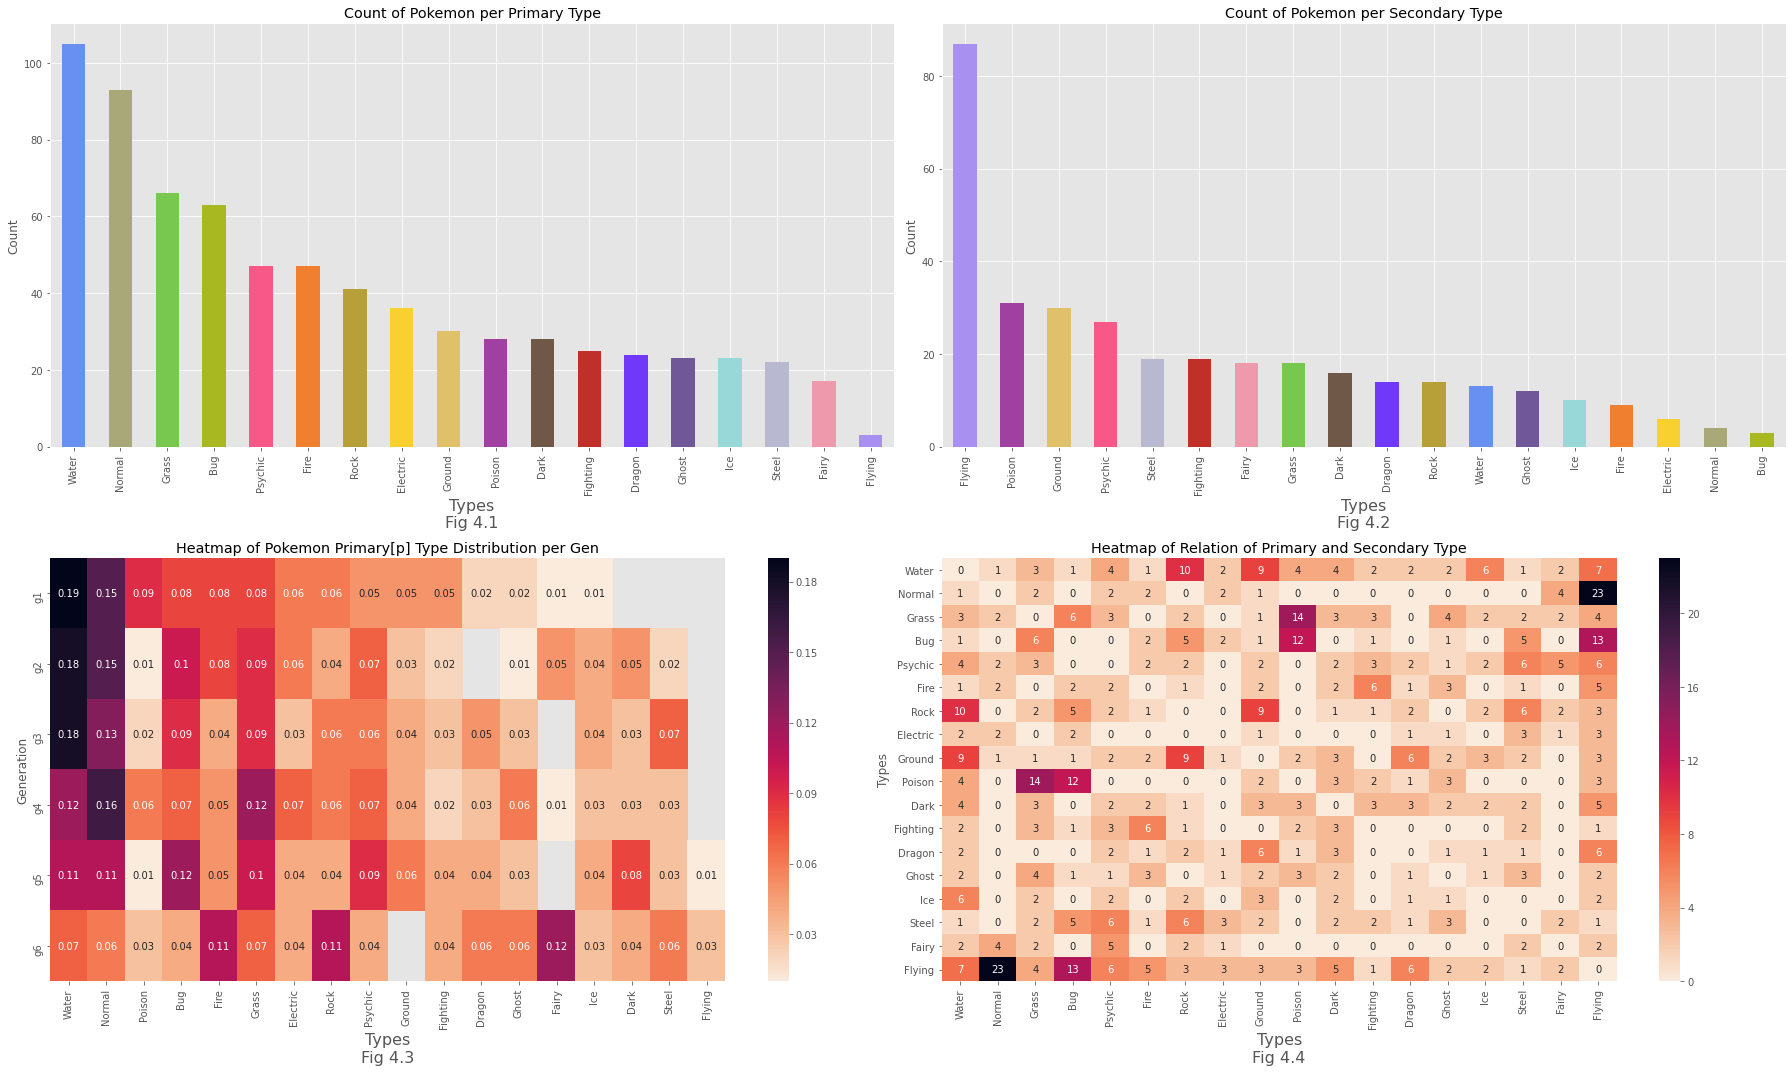

In [10]:
fig, ax = plt.subplots(2,2,figsize=(25,15))
types = list(df.Type_1.value_counts().index)
poke_colors = {'Bug':'#A8B820', 'Dark':'#705848', 'Dragon':'#7038F8', 'Electric':'#F8D030', 'Fairy':'#EE99AC', 'Fighting':'#C03028', 'Fire':'#F08030', 'Flying':'#A890F0', 'Ghost':'#705898', 'Grass':'#78C850', 'Ground':'#E0C068', 'Ice':'#98D8D8', 'Normal':'#A8A878', 'Poison':'#A040A0', 'Psychic':'#F85888' ,'Rock':'#B8A038', 'Steel':'#B8B8D0', 'Water':'#6890F0'}

# primary bar graph
primary_types = df.Type_1.value_counts()
primary_color = df.Type_1.value_counts().index
primary_types.plot(ax=ax[0,0],kind='bar',color=[poke_colors.get(z,'black') for z in primary_color])
ax[0,0].title.set_text("Count of Pokemon per Primary Type")
ax[0,0].set_ylabel("Count")
ax[0,0].set_xlabel("Types\nFig 4.1", size=16)

#
dual_types = df.Type_2.value_counts()
dual_color = df.Type_2.value_counts().index
dual_types.plot(ax=ax[0,1],kind='bar',color=[poke_colors.get(z,'black') for z in dual_color])
ax[0,1].title.set_text("Count of Pokemon per Secondary Type")
ax[0,1].set_ylabel("Count")
ax[0,1].set_xlabel("Types\nFig 4.2", size=16)

#spliting type per generation.
type_per_g = {}
for i in range(6):
  type1 = df[df['Generation'] == i+1]['Type_1']
  type2 = df[df['Generation'] == i + 1]['Type_2']
  key = 'g' + str(i + 1)
  type_per_g[key] = (type1,type2)

# Percent of Primary Type per Generation

percent1 = []
for x in range(6):
    key = 'g' + str(x+1)
    count = type_per_g[key][0].value_counts() 
    total = count.sum()
    ind = []
    val = []
    for x in count.index:
        ind.append(x)
        val.append(np.round(count[x]/total,2))
    percent1.append(pd.Series(index=ind,data=val,))
    
df_percent_primary= pd.DataFrame(percent1,index=['g1','g2','g3','g4','g5','g6'])

"""
#Percent of Dual Type per Generation

percent2 = []
for x in range(6):
    key = 'g' + str(x+1)
    count = type_per_g[key][1].value_counts() 
    total = count.sum()
    ind = []
    val = []
    for x in count.index:
        ind.append(x)
        val.append(count[x]/total)
    percent2.append(pd.Series(index=ind,data=val,))
    
df_percent2= pd.DataFrame(percent2,index=['g1','g2','g3','g4','g5','g6'])

"""
# Graph gen dist type
cmap = sns.cm.rocket_r
sns.heatmap(df_percent_primary,cmap=cmap,ax=ax[1,0],annot=True)
ax[1,0].title.set_text("Heatmap of Pokemon Primary[p] Type Distribution per Gen")
ax[1,0].set_ylabel("Generation")
ax[1,0].set_xlabel("Types\nFig 4.3", size=16)

# Realation of type_1 and type_2
types = list(df['Type_1'].value_counts().index)
heatmap = pd.DataFrame(index=types,columns=types)
heatmap = heatmap.fillna(0)

for x in range(len(df)):
  if not isinstance(df.iloc[x][3], float):
    y = df.iloc[x].copy()
    heatmap.loc[y['Type_1'],y['Type_2']] += 1
    heatmap.loc[y['Type_2'],y['Type_1']] += 1

#Graph
cmap = sns.cm.rocket_r
sns.heatmap(heatmap, annot=True,cmap=cmap, ax=ax[1,1])
ax[1,1].title.set_text("Heatmap of Relation of Primary and Secondary Type")
ax[1,1].set_ylabel("Types")
ax[1,1].set_xlabel("Types\nFig 4.4", size=16)

plt.tight_layout()

A few things pop out when observing Figures 4.1 and 4.3. One thing that is apparent, Water and Normal types seems to dominate all other types. Looking at 4.3 you can see out of the 6 generations water types were number one in representation 3 times, with normal being a close second. For the other three generations these two were still one of the most represented out of all the other types. Another thing that jumps out at you is that Flying barely appears on the primary om 4.1 and 4.3, more surprisingly is that flying doesn’t make a appearance as a primary type in the first 4 generations. This is explained if you look at 4.2, as flying being the most common secondary type (over 80). This is an issue because I want to see how Pokemon Types in general are represented in the game.

Before with dealing with the issue of finding the true representation of types in the series, I would like to look at fig 4.4. 4.4 looks at all the matching of dual types. There seem to be a strong link with Flying and Normal types. Also Poison and Grass, Bug and Poison, and Bug and Flying are linked.


<h4><b>Dealing with the Dual Types</b></h4>

So, because I want to see the representation of a type just appearing in the game I will have to deal with the issue of Dual types. There are two solutions I have found to deal with the effect of dual types.

a) Just delete out any Pokemon that has a dual type.

b) Duplicate any Pokemon that has a dual type and it to the Dataframe.

I have decided to do both.

In [11]:
# Creating no dual type DataFrame 

df_no_dual = df.copy()

for x in range(len(df)):
  if not isinstance(df.iloc[x][3], float):
    dup = df.iloc[x].copy()
    dup['Name'] += "_dup"
    dup['Type_1'] = dup['Type_2']
    df_no_dual = df_no_dual.drop(x)

# Creating duplicated Dataframe b)

df_dup = df.copy()

for x in range(len(df)):
  if not isinstance(df.iloc[x][3], float):
    dup = df.iloc[x].copy()
    dup['Name'] += "_dup"
    dup['Type_1'] = dup['Type_2']
    df_dup.loc[len(df_dup)] = dup


In [12]:

#spliting type per generation.
type_per_g_dup = {}
for i in range(6):
  type1 = df_dup[df_dup['Generation'] == i+1]['Type_1']
  type2 = df_dup[df_dup['Generation'] == i + 1]['Type_2']
  key = 'g' + str(i + 1)
  type_per_g_dup[key] = (type1,type2)

# Percent of Primary Type per Generation

percent1 = []
for x in range(6):
    key = 'g' + str(x+1)
    count = type_per_g_dup[key][0].value_counts() 
    total = count.sum()
    ind = []
    val = []
    for x in count.index:
        ind.append(x)
        val.append(np.round(count[x]/total,2))
    percent1.append(pd.Series(index=ind,data=val,))
    
df_percent_primary_dup= pd.DataFrame(percent1,index=['g1','g2','g3','g4','g5','g6'])


Now that I have these Dataframes, for finding the distribution of types I will only use the duplicated Pokemon dataframe, because that will show me all the typing’s that have appeared in Pokemon.!

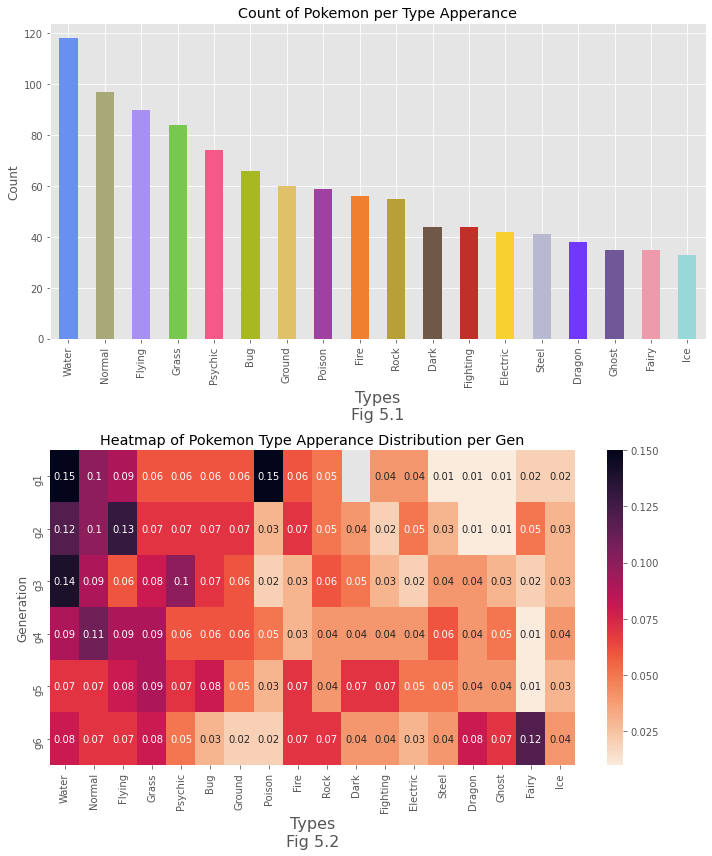

In [13]:
fig, ax = plt.subplots(2,1, figsize=(10,12))

# Graph 1 count of duplicated dataframe

primary_types_dup = df_dup.Type_1.value_counts()
#primary_types_dup = primary_types_dup.reindex(df.Type_1.value_counts().index)
primary_color_dup = primary_types_dup.index
primary_types_dup.plot(ax=ax[0],kind='bar',color=[poke_colors.get(z,'black') for z in primary_color_dup])
ax[0].title.set_text("Count of Pokemon per Type Apperance")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Types\nFig 5.1", size=16)

# Graph 2 Heatmap of distribution per generation

cmap = sns.cm.rocket_r
df_percent_primary_dup = df_percent_primary_dup[primary_types_dup.index]
sns.heatmap(df_percent_primary_dup, ax=ax[1],cmap=cmap,annot=True)
ax[1].title.set_text("Heatmap of Pokemon Type Apperance Distribution per Gen")
ax[1].set_ylabel("Generation")
ax[1].set_xlabel("Types\nFig 5.2", size=16)

plt.tight_layout()

These two graphs are a better representation of type appearance in the game. As expected, Flying went from being one of the least appearing type to in to top three types. We also see the Dragon Ghost and Fairy being one of the least appearing types in the game, this makes sense to people who played the game (these types of Pokemon tend to be some of the strongest)

<h3>How are Game Stats Distributed to Each Type?</h3> 

Now that we know how many Pokemon we should have, how much total stats they should have, and how many different types of Pokemon we should have, the last thing I would like to look at is the distribution of battle stats of each of the types and see if there are any patterns.

To do this I will get the percentages, for each Pokemon, of each battle stat:  'HP', 'Attack’, ‘Defense', 'Sp_Atk', 'Sp_Def', 'Speed', compared to their total stats. I will then group all the Pokemon by their type and take the average. 

The result of this will give me the density of each battle stats to the Pokemon's respective battle stats. Also, I will be doing this to all three dataframe (duplicated, removed dual, and the original df), to see if the splitting affects the results.

In [14]:
game = ['Name','Type_1','Total', 'HP', 'Attack','Defense', 'Sp_Atk', 'Sp_Def', 'Speed','Color','Height_m','Weight_kg','isLegendary','Catch_Rate']

# Getting Percentage of each stat compared to total for no dual dataframe

types_games_no_dual = df_no_dual[game].copy()

for x in range(len(types_games_no_dual)):
    total = types_games_no_dual.iloc[x,2]
    types_games_no_dual.iloc[x,3] = types_games_no_dual.iloc[x,3]/total
    types_games_no_dual.iloc[x,4] = types_games_no_dual.iloc[x,4]/total
    types_games_no_dual.iloc[x,5] = types_games_no_dual.iloc[x,5]/total
    types_games_no_dual.iloc[x,6] = types_games_no_dual.iloc[x,6]/total
    types_games_no_dual.iloc[x,7] = types_games_no_dual.iloc[x,7]/total
    types_games_no_dual.iloc[x,8] = types_games_no_dual.iloc[x,8]/total

# Getting Percentage of each stat compared to total for dup dataframe
types_games_dup = df_dup[game].copy()

for x in range(len(types_games_dup)):
    total = types_games_dup.iloc[x,2]
    types_games_dup.iloc[x,3] = types_games_dup.iloc[x,3]/total
    types_games_dup.iloc[x,4] = types_games_dup.iloc[x,4]/total
    types_games_dup.iloc[x,5] = types_games_dup.iloc[x,5]/total
    types_games_dup.iloc[x,6] = types_games_dup.iloc[x,6]/total
    types_games_dup.iloc[x,7] = types_games_dup.iloc[x,7]/total
    types_games_dup.iloc[x,8] = types_games_dup.iloc[x,8]/total
    
# Getting orginal per

df_games = df[game].copy()

for x in range(len(df_games)):
    total = df_games.iloc[x,2]
    df_games.iloc[x,3] = df_games.iloc[x,3]/total
    df_games.iloc[x,4] = df_games.iloc[x,4]/total
    df_games.iloc[x,5] = df_games.iloc[x,5]/total
    df_games.iloc[x,6] = df_games.iloc[x,6]/total
    df_games.iloc[x,7] = df_games.iloc[x,7]/total
    df_games.iloc[x,8] = df_games.iloc[x,8]/total

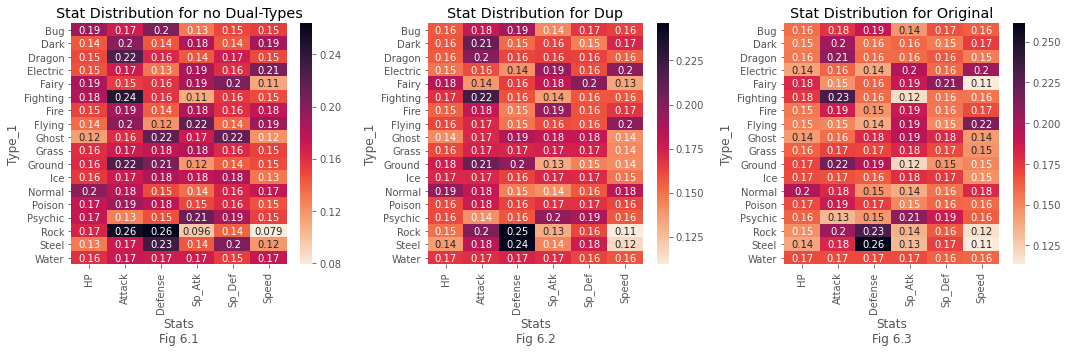

In [15]:
stat_list =['HP','Attack','Defense', 'Sp_Atk', 'Sp_Def', 'Speed']

#Groupby type

no_dual_group_type = types_games_no_dual.groupby('Type_1')
dup_group_type = types_games_dup.groupby('Type_1')
group_type = df_games.groupby('Type_1')

#Graph comparing stat distribution per type
fig, ax = plt.subplots(1,3,figsize=(15,5))

sns.heatmap(no_dual_group_type.mean()[stat_list],ax=ax[0], cmap=cmap,annot=True)
ax[0].title.set_text("Stat Distribution for no Dual-Types")
ax[0].set_xlabel("Stats\nFig 6.1")

sns.heatmap(dup_group_type.mean()[stat_list],ax=ax[1], cmap=cmap,annot=True)
ax[1].title.set_text("Stat Distribution for Dup")
ax[1].set_xlabel("Stats\nFig 6.2")

sns.heatmap(group_type.mean()[stat_list],ax=ax[2], cmap=cmap,annot=True)
ax[2].title.set_text("Stat Distribution for Original")
ax[2].set_xlabel("Stats\nFig 6.3")

plt.tight_layout()

It appears that removing the entries of Dual-Types does not really affect the distribution of stats per Type. Fig can be seen as the distribution of stats of Pure Types. 

I will be focusing on fig 6.2 because I believe the represent the bigger picture of the relationship of types and battle stat distribution. 

There a couple of relationships that seemed obvious to me.

Rock and Steel having high defense but low speed.
Fighting Types having high attack but low special attack and the inverse for Physic types.

Something’s I learned was that:
Water is one of the most balanced of the types.
Ghost having some of the lowest stamina out of all the types. 
Fairy types being very slow.

<h1><b>Machine Learning Algorithms</b></h1>

<h2>Unsupervised Learning: Are there any realtionships in Catch Rate</h2>

One of the biggest and most famous aspect of Pokemon is the catching feature. If I am going to make a Pokemon game, it is very important to understand how this aspect. Coming into this I assumed Pokemon with the most stats would be the hardest to catch. Let’s observe the graph of the relation of these two variables to see if this assumption is correct.

-0.7382796489667667


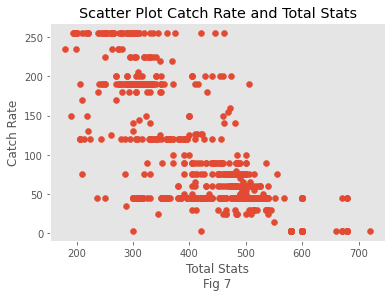

In [36]:
from scipy.stats import pearsonr

total_catch_x = df['Total']
total_catch_y = df['Catch_Rate']
plt.scatter(total_catch_x,total_catch_y)
plt.xlabel("Total Stats\nFig 7")
plt.ylabel("Catch Rate")
plt.title("Scatter Plot Catch Rate and Total Stats")
plt.grid()
corr, _ = pearsonr(total_catch_x,total_catch_y)
print(corr)

As you can see while there is a negative correlation between stats and catch rate (-0.738), However this graph is also very noisy. There also some things that confuse me about this graph. First there seems to be quite a lot of Pokemon that are very hard to catch that are not really strong (bottom left corner). Also, there are Pokemon that have better stats a lot of Pokemon but are some of the easiest to catch.

To try to get an understanding of this I will run a K-mean clustering algorithm to see if there are any relationships to observe. Because I have no idea how many relations there are, I will be using the elbow method to find the optimal number of Clusters.

Text(0.5, 0, 'Num of Clusters\nFig 8')

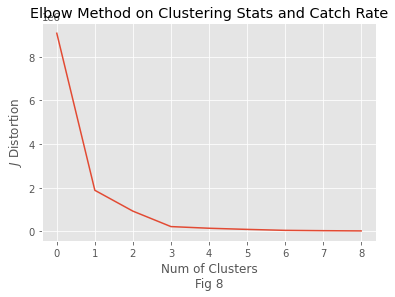

In [35]:
cluster = pd.DataFrame(total_catch_x,total_catch_y)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster)
    distortions.append(kmeanModel.inertia_)
    
plt.plot(distortions)
plt.title("Elbow Method on Clustering Stats and Catch Rate")
plt.ylabel("$J$ Distortion")
plt.xlabel("Num of Clusters\nFig 8")

The Elbow Method works by measuring the distortion of the clusters (distance the cluster from the center), after iterating k Means for different cluster amount. An elbow point is a point in the graph where the $\Delta y$ goes from large to small while the $\Delta x$ go from small to large, this point marks the optimal amount of cluster before there are too many clusters to detect actual trends. So, the elbow method for this model worked and we found that 3 clusters were a good number to use. 

Because K-mean is randomly initiated its important to run the algorithms multiple times to reduce the chances of getting local minimum clusters. To do this we set n_init = 100 this should run k mean 100 times and select the cluster that has the min distortion.


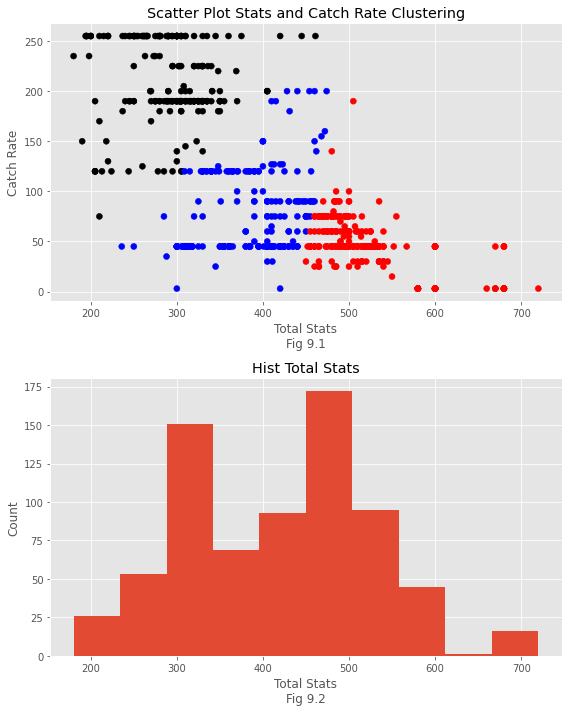

In [34]:
#random_state=
distortions = []


kmeanModel = KMeans(n_clusters=3,n_init=100)
result = kmeanModel.fit_predict(df[['Total','Catch_Rate']])


cluster_df = pd.DataFrame(df[['Total','Catch_Rate','Has_Evo']])
cluster_df['cluster'] = result 

fig, ax = plt.subplots(2,1,figsize=(8,10))
# graph 1 Total Scatter

#graph 1 varibles  
cluster_color={0:'blue',1 :'black',2:'red'}
x = cluster_df['Total']
y = cluster_df['Catch_Rate']
label = result
label_color = [cluster_color[l] for l in label]
ax[0].scatter(x, y, color=label_color)
ax[0].set_xlabel("Total Stats\nFig 9.1")
ax[0].set_ylabel("Catch Rate")
ax[0].title.set_text("Scatter Plot Stats and Catch Rate Clustering")

#graph 2 total stats histogram
ax[1].hist(count_split,bins=10)
ax[1].set_xlabel("Total Stats\nFig 9.2")
ax[1].set_ylabel("Count")
ax[1].title.set_text("Hist Total Stats")
ax[1].plot()

plt.tight_layout()

Looking at what the relationship is cluster represent. The top cluster can represent the Pokémon that you meet at the beginning at the game. These Pokémon are going to be super easy to catch and their stats are not going to max out that much. These Pokémon also are going to be the ones that if they evolve their evolution might end up in the red section. These Pokemon are probably located on the majority of fig 2 and the left tail of fig 3.

The middle section can be the Pokemon that you encounter in the middle of the game. These Pokemon are a little hard to catch but they have more stats. Also looking at the red section, you notice some of these Pokémon have low stats while also having a low catch rate. These Pokemon are most likely the Pokémon that can evolve into some of the higher end Pokémon (located at the right edge of the fig 2 graph). These Pokémon are probly located on the right edge of fig 2 and the left edge of fig three. 

The last cluster are the end game Pokémon. These are the Pokemon That are the hardest to catch but also have the most stats. These are the Pokémon that have probably reached their final evolution. If a Pokemon can evolve in this section, it is probably a Legendary or it evolves into one of the best Pokemon in the game.

<h2>Supervised Learning</h2> 


There appears to be somewhat of relationship between these three variables (Catch Rate, Total Stats, Has_evo), lets graph the scatter plots of these variables and compare them to the histograms we graphed earlier.

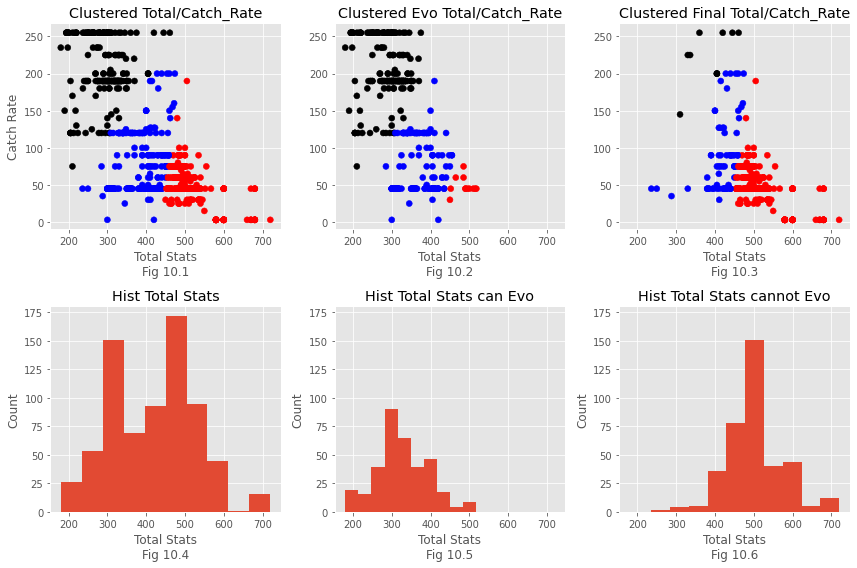

In [44]:
fig, ax = plt.subplots(2,3,figsize=(12,8))
# Hist xlim (0, 800) , ylim(0,200) | scatter lim = xlim [0, 800] , ylim[0,300]

#graph 1 varibles  
cluster_color={0:'blue',1 :'black',2:'red'}
x = cluster_df['Total']
y = cluster_df['Catch_Rate']
label = result
label_color = [cluster_color[l] for l in label]
ax[0,0].scatter(x, y, color=label_color)
ax[0,0].set_xlabel("Total Stats\nFig 10.1")
ax[0,0].set_ylabel("Catch Rate")

# graph 2 Evo Scatter

#graph 2 varibles

cluster_df_evo = cluster_df[cluster_df['Has_Evo'] == True]
e_x = cluster_df_evo['Total']
e_y = cluster_df_evo['Catch_Rate']
e_label = cluster_df_evo['cluster']
ax[0,0].title.set_text("Clustered Total/Catch_Rate")

e_label_color = [cluster_color[l] for l in e_label]
ax[0,1].scatter(e_x, e_y, color=e_label_color)
ax[0,1].set_xlim(ax[0,0].get_xlim())
ax[0,1].set_ylim(ax[0,0].get_ylim())
ax[0,1].set_xlabel("Total Stats\nFig 10.2")
ax[0,1].title.set_text("Clustered Evo Total/Catch_Rate")

# graph 3 Final Scatter

#graph 3 varibles

cluster_df_final = cluster_df[cluster_df['Has_Evo'] == False]
f_x = cluster_df_final['Total']
f_y = cluster_df_final['Catch_Rate']
f_label = cluster_df_final['cluster']

f_label_color = [cluster_color[l] for l in f_label]
ax[0,2].scatter(f_x, f_y, color=f_label_color)
ax[0,2].set_xlim(ax[0,0].get_xlim())
ax[0,2].set_ylim(ax[0,0].get_ylim())
ax[0,2].set_xlabel("Total Stats\nFig 10.3")
ax[0,2].title.set_text("Clustered Final Total/Catch_Rate")


#graph 4 total stats histogram
ax[1,0].hist(count_split,bins=10)
ax[1,0].title.set_text("Hist Total Stats")
ax[1,0].set_xlabel("Total Stats\nFig 2")
ax[1,0].set_ylabel("Count")
ax[1,0].set_xlabel("Total Stats\nFig 10.4")
ax[1,0].plot()


# graph 5 evo hist
hist1 = ax[1,1].hist(count_evo_stats)
ax[1,1].title.set_text("Hist Total Stats can Evo")
ax[1,1].set_xlabel("Total Stats\nFig 8.2")
ax[1,1].set_ylabel("Count")
ax[1,1].set_xlim(ax[1,0].get_xlim())
ax[1,1].set_ylim(ax[1,0].get_ylim())
ax[1,1].set_xlabel("Total Stats\nFig 10.5")


# graph 6 final hist
hist2 = ax[1,2].hist(count_final_stats)
ax[1,2].title.set_text("Hist Total Stats cannot Evo")
ax[1,2].set_xlabel("Total Stats\nFig 8.3")
ax[1,2].set_ylabel("Count")
ax[1,2].set_xlim(ax[1,0].get_xlim())
ax[1,2].set_ylim(ax[1,0].get_ylim())
ax[1,2].set_xlabel("Total Stats\nFig 10.6")

plt.tight_layout()


So, I think my intuition is right if you look at the second figure the black cluster is the Pokemon you can evolve from the beginning of the game. The blue and small amount of red are the Pokemon that you meet in the mid game to end game that you can evolve. Following that logic Figure 3 the Black and Blue cluster are the Pokemon that evolved in the early game, and the Red are the Pokemon that evolved from the blue and red clusters in fig 2.


<h3>Predictive Model for Catch Rate:KNN</h3>

It appears that these attributes are centralized in different areas. Because of this I believe that KNN would be a good algorithm because it uses its neighbors to decide its classification. I will be using the Total Stats and Catch Rate as the X in addition I will be using the height and weight variable (using the logic that smaller and lighter Pokémon are more likely to have evolutions) and the target variable will be the Has_Evo column.

In [22]:
# Try adding catch rate
x_list = ['Total','Catch_Rate','Height_m','Weight_kg']
X = df[x_list]
y = df['Has_Evo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
classifier = KNeighborsClassifier()
#Run without cross validation
from sklearn.metrics import accuracy_score

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9124423963133641


It appears this model is quite accurate let do some cross validation to ensure the model's accuracy. 

In [23]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

test_means = []
test_stds = []
train_means = []

classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

knn_num = range(1,20)

for x in knn_num:
    classifier = KNeighborsClassifier(n_neighbors=x,p=2)       
    scores = cross_validate(estimator=classifier,
                            X=X,
                            y=y,
                            cv=5,
                            return_train_score=True)
    test_means.append(np.mean(scores['test_score']))
    test_stds.append(np.std(scores['test_score']))
    train_means.append(np.mean(scores['train_score']))

#scores['test_score'].mean()
#scores['train_score'].mean()

In [24]:
np.mean(test_means)

0.9054256370771796

Now that we have validated the accuracy run for loop to check the performance for different k to pick the optimal k for our model.

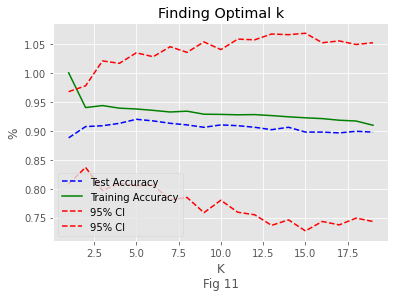

In [26]:
plt.plot(knn_num, test_means, 'b--', label="Test Accuracy")
plt.plot(knn_num, train_means, 'g-', label="Training Accuracy")
plt.plot(knn_num, np.array(test_means) + 2*np.array(test_stds), 'r--', label="95% CI")
plt.plot(knn_num, np.array(test_means) - 2*np.array(test_stds), 'r--', label="95% CI")
plt.title("Finding Optimal k")
plt.xlabel("K\nFig 11")
plt.ylabel("%")
plt.legend()

It appears the training and test accuracy converges around k= 5. I’m going to use k = 5

In [27]:
test_means = []
test_stds = []
train_means = []

population_size = len(df)

sample_sizes = list(range(20,len(df),20))

for sample_size in sample_sizes:
    classifier = KNeighborsClassifier(n_neighbors=5,p=2)       
    scores = cross_validate(estimator=classifier,
                            X=X[:sample_size],
                            y=y[:sample_size],
                            cv=5,
                            return_train_score=True)
    test_means.append(np.mean(scores['test_score']))
    test_stds.append(np.std(scores['test_score']))
    train_means.append(np.mean(scores['train_score']))

#scores['test_score'].mean()
#scores['train_score'].mean()

Text(0, 0.5, '%')

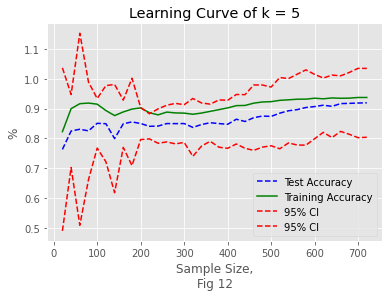

In [28]:
plt.plot(sample_sizes, test_means, 'b--', label="Test Accuracy")
plt.plot(sample_sizes, train_means, 'g-', label="Training Accuracy")
plt.plot(sample_sizes, np.array(test_means) + 2*np.array(test_stds), 'r--', label="95% CI")
plt.plot(sample_sizes, np.array(test_means) - 2*np.array(test_stds), 'r--', label="95% CI")
plt.title("Learning Curve of k = 5")
plt.legend()
plt.xlabel("Sample Size,\nFig 12")
plt.ylabel("%")

Notice that the distance between the testing and training error is very small as $n \rightarrow len(df)$ this signifies that overfitting is not happening. Also, the training and testing accuracy converges at a high percentage, so this also is not a case of underfitting.

Last let’s see the confusion matrix of this model to see the number of false positives and negatives.

In [29]:
# Run Confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
y_pred = cross_val_predict(classifier, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)

In [30]:
print(conf_mat)
print(f1_score(y, y_pred))
print(accuracy_score(y, y_pred))

[[353  24]
 [ 35 309]]
0.9128508124076811
0.9181692094313454


So out of around 353 Pokemon that cannot evolve the algorithm only misdiagnosed around 24 of them saying they could evolve.

And out of around 309 Pokemon that cannot evolve the model only incorrectly stated around 33 of them can evolve.

<h1>Conclusion</h1>

<ul>
  <li><b>Data Visulisation Questions</b></li>
    <ol>
      <li>How many Pokemon are added each generation?</li>
      <li>How are Total stats distributed?</li>
      <li>How are types distributed?</li>
      <li>How are types and battle stats related?</li>
    </ol>
  <li><b>Machine Algortithm Questions</b></li>
  <ol>
  <li>Unsupervised Learning: Are there any relationships in Catch Rate?</li>
  <li>Supervised Learning: Can I build a predictive model from any information gained?</li>
  </ol>
</ul>

In conclusion, after running some exploratory data analytics we were able to find the average amount of Pokémon added in each generation (Total and Dual-Types). We were also able to see how GameFreak distributed total stats for every Pokemon, that they were normally distributed between if there were able to evolve or not. We then saw how GameFreaks distributed typing (they really liked water and normal types) and we saw how common some types are linked to one another. The last things we explored through visulisation is the distributions of battle stats for each Pokemon type.

We also were able to split up the relationship between Total stats and catch rate using k-means clustering and see that if the Pokemon could evolve was linked to these variables. We lastly used knn to create a predictive model that was pretty successful (90% accuracy and f1 score) to predict if the Pokemon could evolve.